# Assignment 3

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [2]:
import numpy as np
import pandas as pd
import re
import os
from matplotlib import pyplot as plt
import seaborn as sns
from ggplot import *

In [5]:
def read_single_file(files, types, key):
    '''Load a single excel file.
    
    Args:
        files: file name
        types(binary): fruit or vegetables
        key: the key word for information extracting. i.e, Fresh
    
    Returns:
        Fresh rows of given file
    '''
    path = './assignment3_data/' + types + '/' + files
    raw_df = pd.read_excel(path, skiprows=1, header=0)
    food = re.sub(r'\..*', '', files)  # extract the food names.
    
    # select the 'Fresh' row and delete the useless features
    if np.nansum(raw_df['Form'].str.startswith(key).tolist()) == 0:
        return None
    else:
        clean_df = raw_df.ix[raw_df['Form'].str.startswith(key) == True, raw_df.columns[[0, 1, 3, 4, 6]]] # select the row and change it to Series.   
    
    clean_df.insert(0, 'type', types) 
    clean_df.insert(1, 'food', food) 
    
    return clean_df

def read_all_files(file_ls, keytype, keyword):
    '''Read all file in the given directory
    
    Args:
        keytype: fruit or vegetables
        keyword: i.e Fresh1
    Returns:
        Pandas Data Frame contains all Fresh rows
    '''
    data_list = [read_single_file(i, keytype, keyword) for i in file_ls]
    df = pd.concat(data_list)
    df.rename(columns={'Form': 'form', 'Average retail price ': 'price_per_lb', 
                          'Preparation': 'yield', 'Size of a ': 'lb_per_cup', 'Average price': 'price_per_cup'}, inplace = True)
    return df

In [6]:
file_name_fruit = os.listdir('./assignment3_data/fruit/')
fresh_fruit = read_all_files(file_name_fruit, 'fruit', 'Fresh1')

In [7]:
fresh_fruit.head()

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
1,fruit,apples,Fresh1,1.56752,0.9,0.242508,0.422373
1,fruit,apricots,Fresh1,3.04007,0.93,0.363763,1.1891
1,fruit,bananas,Fresh1,0.566983,0.64,0.330693,0.292965
1,fruit,blackberries,Fresh1,5.77471,0.96,0.31967,1.92292
1,fruit,blueberries,Fresh1,4.73462,0.95,0.31967,1.59318


__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

In [8]:
file_name_veg = os.listdir('./assignment3_data/vegetables/')
fresh_veg = read_all_files(file_name_veg, 'vegetables', 'Fresh')

In [9]:
fresh_veg.head(8)

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
1,vegetables,acorn_squash,Fresh1,1.17225,0.458554,0.451948,1.15536
1,vegetables,artichoke,Fresh1,2.21305,0.375309,0.385809,2.27497
1,vegetables,asparagus,Fresh1,3.21349,0.493835,0.396832,2.58227
1,vegetables,avocados,Fresh1,2.23587,0.740753,0.31967,0.964886
1,vegetables,broccoli,Fresh,,,,NaN
1,vegetables,brussels_sprouts,Fresh1,2.76355,1.06,0.341717,0.890898
1,vegetables,butternut_squash,Fresh1,1.24474,0.714,0.451948,0.787893
1,vegetables,cabbage,Fresh green cabbage1,0.579208,0.778797,0.330693,0.245944


In [10]:
index_incorrect = (fresh_veg['price_per_lb'] == ' ') | pd.isnull(fresh_veg['price_per_lb'])
fresh_veg[index_incorrect]

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
1,vegetables,broccoli,Fresh,,,,NaN
1,vegetables,carrots,Fresh,NaN,NaN,NaN,NaN
1,vegetables,cauliflower,Fresh1,,,,NaN
1,vegetables,celery,Fresh1,NaN,NaN,NaN,NaN
1,vegetables,lettuce_romaine,Fresh1,,NaN,,NaN
1,vegetables,mushrooms,Fresh1,NaN,NaN,NaN,NaN
1,vegetables,spinach,Fresh1,NaN,NaN,NaN,NaN
1,vegetables,tomatoes,Fresh,NaN,NaN,NaN,NaN


<h3>We can't see the price of tomato in the data frame above since the 'Fresh' row is empty in those files. I list all files that have the same problem in the above data frame</h3>


__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [11]:
fresh_veg[fresh_veg == ' '] = np.NaN # change the space into NaN
fresh_veg.dropna(inplace=True) # drop the rows containing NaN
fresh = pd.concat([fresh_fruit, fresh_veg]).reset_index(drop=True) # combine and reset the index
print fresh.shape
print fresh.head()

(49, 7)
    type          food     form price_per_lb yield lb_per_cup price_per_cup
0  fruit        apples   Fresh1      1.56752   0.9   0.242508      0.422373
1  fruit      apricots   Fresh1      3.04007  0.93   0.363763        1.1891
2  fruit       bananas   Fresh1     0.566983  0.64   0.330693      0.292965
3  fruit  blackberries  Fresh1       5.77471  0.96    0.31967       1.92292
4  fruit   blueberries   Fresh1      4.73462  0.95    0.31967       1.59318


In [12]:
for i in ['price_per_lb', 'yield', 'lb_per_cup', 'price_per_cup']:
    fresh[i] = fresh[i].astype('float')

fresh.dtypes

type              object
food              object
form              object
price_per_lb     float64
yield            float64
lb_per_cup       float64
price_per_cup    float64
dtype: object

__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?

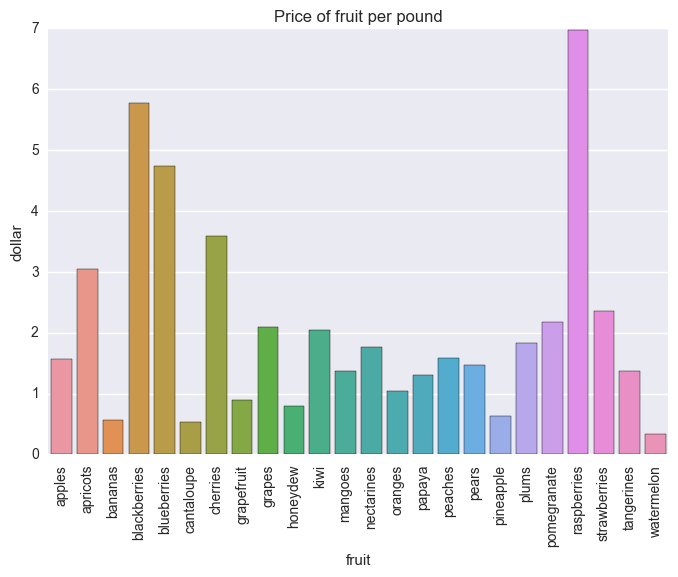

In [13]:
sns.barplot(x='food', y='price_per_lb', data=fresh.ix[fresh['type'] == 'fruit'])
plt.title('Price of fruit per pound')
plt.xticks(rotation='vertical')
plt.ylabel('dollar')
plt.xlabel('fruit')
plt.show()

<h3>We can see that raspberries has the highest price while watermelon is the least expensive</h3>

* How do the price distributions compare for fruit and vegetables?

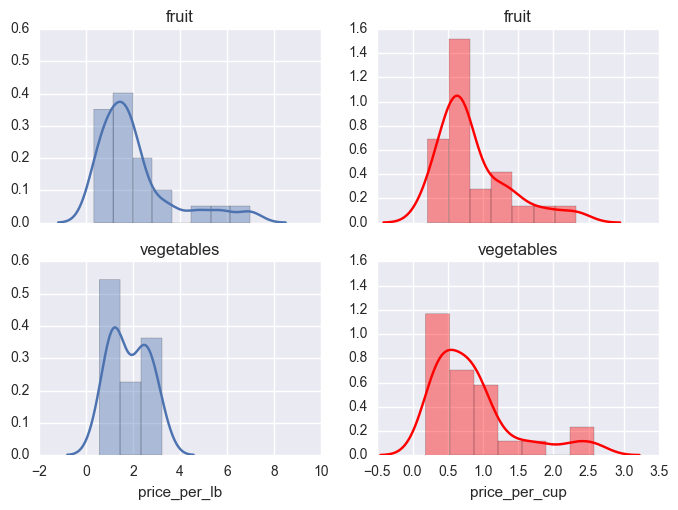

In [14]:
fig, axes = plt.subplots(2,2, sharex='col', sharey='col')
sns.distplot(fresh.ix[fresh['type'] == 'fruit', 'price_per_lb'], ax=axes[0,0], axlabel=False)
sns.distplot(fresh.ix[fresh['type'] == 'fruit', 'price_per_cup'], ax=axes[0,1], axlabel=False, color='r')
sns.distplot(fresh.ix[fresh['type'] == 'vegetables', 'price_per_lb'], ax=axes[1,0])
sns.distplot(fresh.ix[fresh['type'] == 'vegetables', 'price_per_cup'], ax=axes[1,1], color='r')
axes[0,0].title.set_text('fruit')
axes[0,1].title.set_text('fruit')
axes[1,0].title.set_text('vegetables')
axes[1,1].title.set_text('vegetables')
plt.show()

<h3>We can see that for price_per_cup, the distributions between fruit and vegetables are almost same. However for price_per_lb, the distribution of fruit shows one peak while vegetable shows two.</h3>

* Which foods are the best value for the price?

I defined the value for a food as 'price_per_lb * yield' which is the total value for a food

In [15]:
fresh['value'] = fresh['price_per_lb'] * fresh['yield']
fresh.head()

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup,value
0,fruit,apples,Fresh1,1.567515,0.90,0.242508,0.422373,1.410764
1,fruit,apricots,Fresh1,3.040072,0.93,0.363763,1.189102,2.827267
2,fruit,bananas,Fresh1,0.566983,0.64,0.330693,0.292965,0.362869
3,fruit,blackberries,Fresh1,5.774708,0.96,0.319670,1.922919,5.543720
4,fruit,blueberries,Fresh1,4.734622,0.95,0.319670,1.593177,4.497891


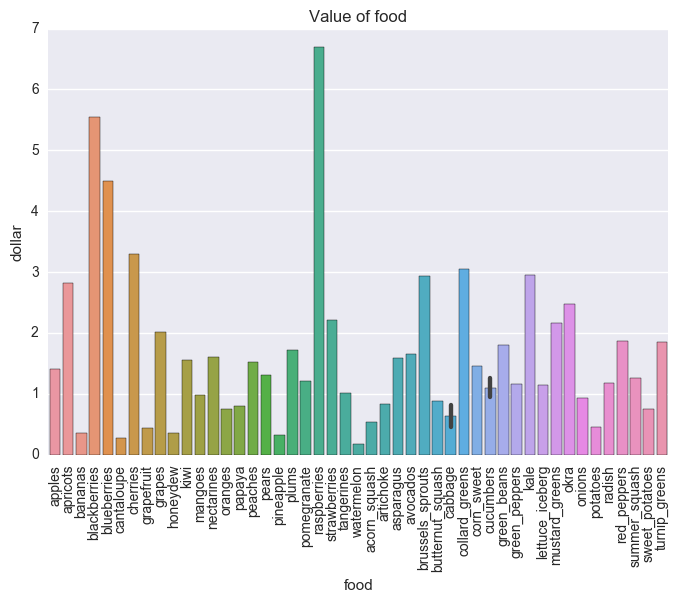

In [16]:
sns.barplot(x='food', y='value', data=fresh)
plt.title('Value of food')
plt.xticks(rotation='vertical')
plt.ylabel('dollar')
plt.xlabel('food')
plt.show()

<h3>We can draw the conclustion that raspberry has the most value among all kinds of food</h3>

* What's something surprising about this data set?

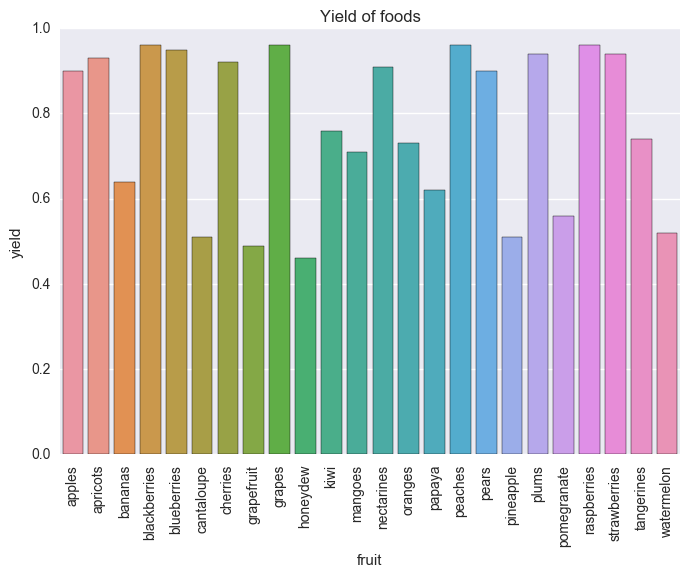

In [17]:
sns.barplot(x='food', y='yield', data=fresh.ix[fresh['type'] == 'fruit'])
plt.title('Yield of foods')
plt.xticks(rotation='vertical')
plt.ylabel('yield')
plt.xlabel('fruit')
plt.show()

<h3>Compare the picture of yield to the one of price per pound. We can see that the expensive fruit also have high yield which may shows that those fruit is quite popular and desperately needed </h3>

* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

I am going to make a indicator: $I = \frac{nutrition * yield}{price}$ since we want the food has more nutrition and yield while with low price.

In [18]:
fresh['I'] = fresh['lb_per_cup'] * fresh['yield'] / fresh['price_per_lb']
fresh.head()

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup,value,I
0,fruit,apples,Fresh1,1.567515,0.90,0.242508,0.422373,1.410764,0.139238
1,fruit,apricots,Fresh1,3.040072,0.93,0.363763,1.189102,2.827267,0.111280
2,fruit,bananas,Fresh1,0.566983,0.64,0.330693,0.292965,0.362869,0.373280
3,fruit,blackberries,Fresh1,5.774708,0.96,0.319670,1.922919,5.543720,0.053143
4,fruit,blueberries,Fresh1,4.734622,0.95,0.319670,1.593177,4.497891,0.064142


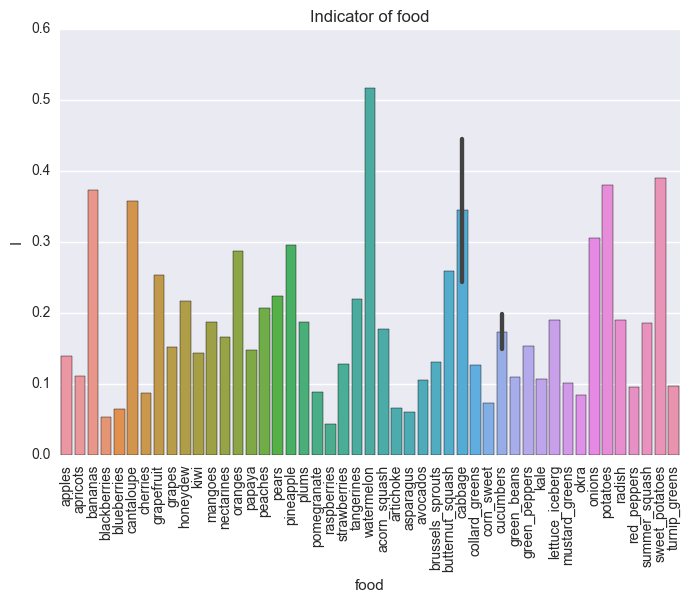

In [19]:
sns.barplot(x='food', y='I', data=fresh)
plt.title('Indicator of food')
plt.xticks(rotation='vertical')
plt.ylabel('I')
plt.xlabel('food')
plt.show()

<h3>Watermelon has the best combination of price, nutrition and yield while raspberry has the least</h3>